In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df= pd.read_excel(r"/US_Accident (1).xlsx")
df.head()

,Report Number,Crash Date/Time,Route Type,Road Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,...,Vehicle Damage Extent,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude
0,MCP3296002G,04/21/2024 06:53:00 PM,County Route,NaN,"Sideswipe, Opposite Direction",Clear,Dry,Daylight,No Controls,"Unknown, Unknown",...,Disabling,Passenger Car,Turning Left,Northbound,25,2013,HYUNDAI,SONATA,39.105339,-76.989845
1,MCP276700BF,03/14/2024 05:23:00 PM,US (State),COLUMBIA PIKE (SB/L),"Sideswipe, Same Direction",Clear,Dry,Daylight,No Controls,"Unknown, Unknown",...,Vehicle Not at Scene,Passenger Car,Overtaking/Passing,Southbound,45,0,NaN,NaN,39.040003,-76.997223
2,MCP32790038,05/15/2024 07:30:00 AM,Maryland (State) Route,VEIRS MILL RD (WB/L),Front to Rear,Clear,NaN,Daylight,No Controls,"Unknown, Unknown",...,Vehicle Not at Scene,Passenger Car,Moving Constant Speed,Northbound,45,2006,CHEVROLET,COBALT,39.073096,-77.111254
3,MCP34000014,04/28/2024 05:30:00 PM,County Route,HARDING DR,Front to Rear,Clear,Dry,Daylight,No Controls,"Unknown, Unknown",...,Functional,Passenger Car,Moving Constant Speed,Southbound,25,2012,NISSAN,ALTIMA,39.021944,-77.018300
4,MCP3341003F,2024-12-03 07:30:00,Private Route,NaN,Angle,Clear,Dry,Daylight,No Controls,"Unknown, Unknown",...,Functional,Pickup,Turning Left,Southbound,35,2015,CHEVROLET,SILVERADO,39.090304,-77.071180


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202404 entries, 0 to 202403
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Report Number           202404 non-null  object 
 1   Crash Date/Time         202404 non-null  object 
 2   Route Type              182563 non-null  object 
 3   Road Name               179744 non-null  object 
 4   Collision Type          201819 non-null  object 
 5   Weather                 189048 non-null  object 
 6   Surface Condition       179280 non-null  object 
 7   Light                   200959 non-null  object 
 8   Traffic Control         174112 non-null  object 
 9   Driver Substance Abuse  171084 non-null  object 
 10  Driver At Fault         202404 non-null  object 
 11  Injury Severity         200392 non-null  object 
 12  Driver Distracted By    200229 non-null  object 
 13  Vehicle Damage Extent   202088 non-null  object 
 14  Vehicle Body Type   

In [18]:
df["Crash Date/Time"]= pd.to_datetime(df["Crash Date/Time"])
df["Crash Time"]= df["Crash Date/Time"].dt.strftime("%H:%M")


/tmp/ipython-input-2083586569.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Crash Date/Time"]= pd.to_datetime(df["Crash Date/Time"])


In [19]:
df= df.drop("Crash Date/Time", axis=1)
df.head()

,Report Number,Route Type,Road Name,Collision Type,Weather,Surface Condition,Light,Traffic Control,Driver Substance Abuse,Driver At Fault,...,Vehicle Body Type,Vehicle Movement,Vehicle Going Dir,Speed Limit,Vehicle Year,Vehicle Make,Vehicle Model,Latitude,Longitude,Crash Time
0,MCP3296002G,County Route,NaN,"Sideswipe, Opposite Direction",Clear,Dry,Daylight,No Controls,"Unknown, Unknown",No,...,Passenger Car,Turning Left,Northbound,25,2013,HYUNDAI,SONATA,39.105339,-76.989845,18:53
1,MCP276700BF,US (State),COLUMBIA PIKE (SB/L),"Sideswipe, Same Direction",Clear,Dry,Daylight,No Controls,"Unknown, Unknown",No,...,Passenger Car,Overtaking/Passing,Southbound,45,0,NaN,NaN,39.040003,-76.997223,17:23
2,MCP32790038,Maryland (State) Route,VEIRS MILL RD (WB/L),Front to Rear,Clear,NaN,Daylight,No Controls,"Unknown, Unknown",No,...,Passenger Car,Moving Constant Speed,Northbound,45,2006,CHEVROLET,COBALT,39.073096,-77.111254,07:30
3,MCP34000014,County Route,HARDING DR,Front to Rear,Clear,Dry,Daylight,No Controls,"Unknown, Unknown",No,...,Passenger Car,Moving Constant Speed,Southbound,25,2012,NISSAN,ALTIMA,39.021944,-77.018300,17:30
4,MCP3341003F,Private Route,NaN,Angle,Clear,Dry,Daylight,No Controls,"Unknown, Unknown",No,...,Pickup,Turning Left,Southbound,35,2015,CHEVROLET,SILVERADO,39.090304,-77.071180,07:30


In [20]:
df.columns= df.columns.str.lower().str.replace(" ","_")

In [21]:
cols= df.columns.tolist()
print(cols)

['report_number', 'route_type', 'road_name', 'collision_type', 'weather', 'surface_condition', 'light', 'traffic_control', 'driver_substance_abuse', 'driver_at_fault', 'injury_severity', 'driver_distracted_by', 'vehicle_damage_extent', 'vehicle_body_type', 'vehicle_movement', 'vehicle_going_dir', 'speed_limit', 'vehicle_year', 'vehicle_make', 'vehicle_model', 'latitude', 'longitude', 'crash_time']


In [22]:
df.isnull().sum()

,0
report_number,0
route_type,19841
road_name,22660
collision_type,585
weather,13356
surface_condition,23124
light,1445
traffic_control,28292
driver_substance_abuse,31320
driver_at_fault,0


In [23]:
df = df.apply(lambda col: col.str.title() if col.dtype == "object" else col)

In [24]:
for col in df.columns:
    print(f"Distinct values in {col}:")
    print(df[col].unique())
    print("-"*40)

Distinct values in report_number:
['Mcp3296002G' 'Mcp276700Bf' 'Mcp32790038' ... 'Mcp2902006Z' 'Mcp301000C1'
 'Mcp3411002V']
----------------------------------------
Distinct values in route_type:
['County Route' 'Us (State)' 'Maryland (State) Route' 'Private Route'
 'Municipality Route' 'Spur' 'Local Route' 'Ramp' 'Interstate (State)' nan
 'Bicycle Route' 'Government Route' 'County' 'Crossover'
 'Other Public Roadway' 'Maryland (State)' 'Municipality' 'Service Road'
 'Government' 'Unknown']
----------------------------------------
Distinct values in road_name:
[nan 'Columbia Pike (Sb/L)' 'Veirs Mill Rd (Wb/L)' ...
 'Quince Orchard Rd (Nb/L)' 'Little Brooke Dr' 'Moonwalk Ct']
----------------------------------------
Distinct values in collision_type:
['Sideswipe, Opposite Direction' 'Sideswipe, Same Direction'
 'Front To Rear' 'Angle' 'Single Vehicle' 'Other' 'Unknown' 'Rear To Side'
 'Rear To Rear' 'Front To Front' 'Same Dir Rear End'
 'Straight Movement Angle' 'Head On Left Turn' 'He

In [25]:
df.replace({"Other":"Unknown","Unknown, Unknown": "Unknown"},inplace= True)
df.fillna("Unknown",inplace= True)
df["light"]= df["light"].replace("Dark -- Unknown Lighting","Dark - Unknown Lighting")

In [26]:
df.isnull().sum()

,0
report_number,0
route_type,0
road_name,0
collision_type,0
weather,0
surface_condition,0
light,0
traffic_control,0
driver_substance_abuse,0
driver_at_fault,0


In [27]:
if 'vehicle_make' in df.columns:
    df = df.drop("vehicle_make", axis=1)
if 'vehicle_model' in df.columns:
    df = df.drop("vehicle_model", axis=1)
df.head()

,report_number,route_type,road_name,collision_type,weather,surface_condition,light,traffic_control,driver_substance_abuse,driver_at_fault,...,driver_distracted_by,vehicle_damage_extent,vehicle_body_type,vehicle_movement,vehicle_going_dir,speed_limit,vehicle_year,latitude,longitude,crash_time
0,Mcp3296002G,County Route,Unknown,"Sideswipe, Opposite Direction",Clear,Dry,Daylight,No Controls,Unknown,No,...,Unknown,Disabling,Passenger Car,Turning Left,Northbound,25,2013,39.105339,-76.989845,18:53
1,Mcp276700Bf,Us (State),Columbia Pike (Sb/L),"Sideswipe, Same Direction",Clear,Dry,Daylight,No Controls,Unknown,No,...,Unknown,Vehicle Not At Scene,Passenger Car,Overtaking/Passing,Southbound,45,0,39.040003,-76.997223,17:23
2,Mcp32790038,Maryland (State) Route,Veirs Mill Rd (Wb/L),Front To Rear,Clear,Unknown,Daylight,No Controls,Unknown,No,...,Unknown,Vehicle Not At Scene,Passenger Car,Moving Constant Speed,Northbound,45,2006,39.073096,-77.111254,07:30
3,Mcp34000014,County Route,Harding Dr,Front To Rear,Clear,Dry,Daylight,No Controls,Unknown,No,...,Unknown,Functional,Passenger Car,Moving Constant Speed,Southbound,25,2012,39.021944,-77.018300,17:30
4,Mcp3341003F,Private Route,Unknown,Angle,Clear,Dry,Daylight,No Controls,Unknown,No,...,Unknown,Functional,Pickup,Turning Left,Southbound,35,2015,39.090304,-77.071180,07:30


Time based features

In [28]:
# Converting crash_time to datetime format
df['crash_time'] = pd.to_datetime(df['crash_time'], errors='coerce')

# Extracting useful time features
df['hour'] = df['crash_time'].dt.hour
df['day_of_week'] = df['crash_time'].dt.dayofweek  # Monday=0
df['month'] = df['crash_time'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5,6]).astype(int)
df['is_rush_hour'] = df['hour'].isin([7,8,11,13,17,18,19,20]).astype(int)
df['is_night'] = df['hour'].between(20, 5).astype(int)


/tmp/ipython-input-1085068625.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_time'] = pd.to_datetime(df['crash_time'], errors='coerce')


Vehicle features

In [29]:
# Vehicle age
current_year = pd.Timestamp.today().year
df['vehicle_age'] = current_year - df['vehicle_year']

# Simplified body type
df['vehicle_body_type'] = df['vehicle_body_type'].str.lower().replace({
    'sedan':'car','hatchback':'car','suv':'car',
    'pickup':'truck','lorry':'truck','motorcycle':'bike'
})

# Encoding movement categories
df['vehicle_movement'] = df['vehicle_movement'].str.lower()


Driver features

In [30]:
# Binary risk indicators
df['is_at_fault'] = (df['driver_at_fault'] == 'Yes').astype(int)
df['is_substance'] = (df['driver_substance_abuse'] == 'Yes').astype(int)
df['is_distracted'] = df['driver_distracted_by'].notna().astype(int)

# Driver risk score
df['driver_risk_score'] = df[['is_at_fault','is_substance','is_distracted']].sum(axis=1)


Road and Environment based Features

In [31]:
# Simplifing conditions
df['is_bad_weather'] = df['weather'].isin(['Rain','Snow','Fog','Storm']).astype(int)
df['is_wet_surface'] = df['surface_condition'].isin(['Wet','Snow','Ice']).astype(int)
df['is_dark'] = df['light'].str.contains('Dark', na=False).astype(int)

# Traffic control present or not
df['has_control'] = df['traffic_control'].notna().astype(int)


Spatial features

In [32]:
#importing other necessary libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN

# Cluster crashes spatially (DBSCAN)
coords = df[['latitude','longitude']].dropna()
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)   # eps = ~1km if lat/lon
df.loc[coords.index, 'spatial_cluster'] = db.labels_

# Crash density per cluster
df['cluster_density'] = df.groupby('spatial_cluster')['spatial_cluster'].transform('count')


Categorical features

In [33]:
cat_cols = ['collision_type','road_name','route_type','vehicle_body_type','vehicle_movement']
encoder = LabelEncoder()
for col in cat_cols:
    df[col] = df[col].astype(str).fillna('Unknown')
    df[col] = encoder.fit_transform(df[col])


Exploratory Data Analysis

Crash Severity Distribution

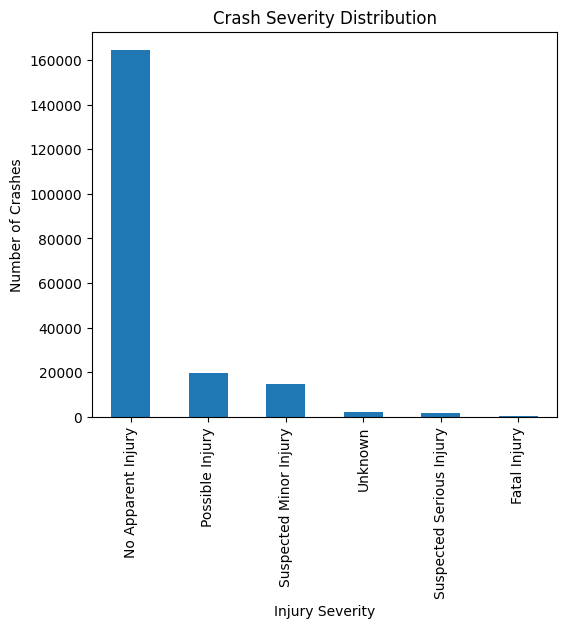

In [34]:
#Crash Severity Distribution
counts = df["injury_severity"].value_counts()

fig, ax = plt.subplots(figsize=(6,5))
counts.plot(kind="bar", ax=ax)
ax.set_title("Crash Severity Distribution")
ax.set_xlabel("Injury Severity")
ax.set_ylabel("Number of Crashes")
plt.show()


Weather vs Injury Severity

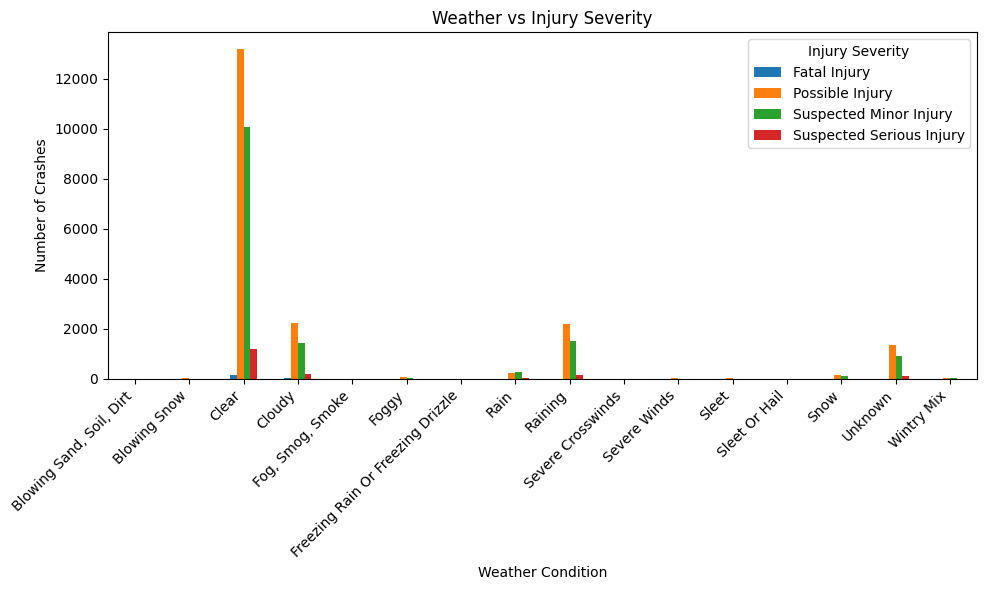

In [35]:
severity_levels = ["Fatal Injury","Possible Injury","Suspected Minor Injury","Suspected Serious Injury"]
pivot = pd.crosstab(df["weather"], df["injury_severity"])
pivot = pivot.reindex(columns=severity_levels, fill_value=0)

pivot.plot(kind="bar", figsize=(10,6))
plt.title("Weather vs Injury Severity")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Injury Severity")
plt.tight_layout()
plt.show()


Surface Condition vs Injury Severity

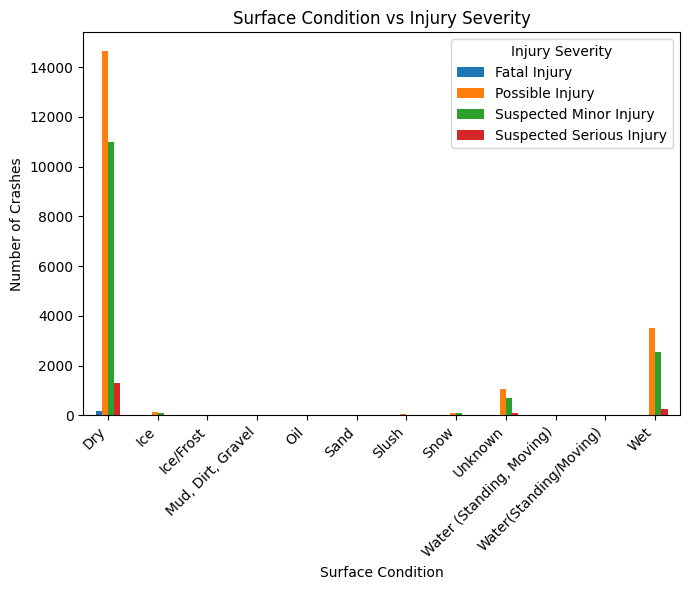

In [36]:
severity_levels = ["Fatal Injury","Possible Injury","Suspected Minor Injury","Suspected Serious Injury"]
pivot = pd.crosstab(df["surface_condition"], df["injury_severity"])
pivot = pivot.reindex(columns=severity_levels, fill_value=0)

pivot.plot(kind="bar", figsize=(7,6))
plt.title("Surface Condition vs Injury Severity")
plt.xlabel("Surface Condition")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Injury Severity")
plt.tight_layout()
plt.show()


Light Condition vs Injury Severity

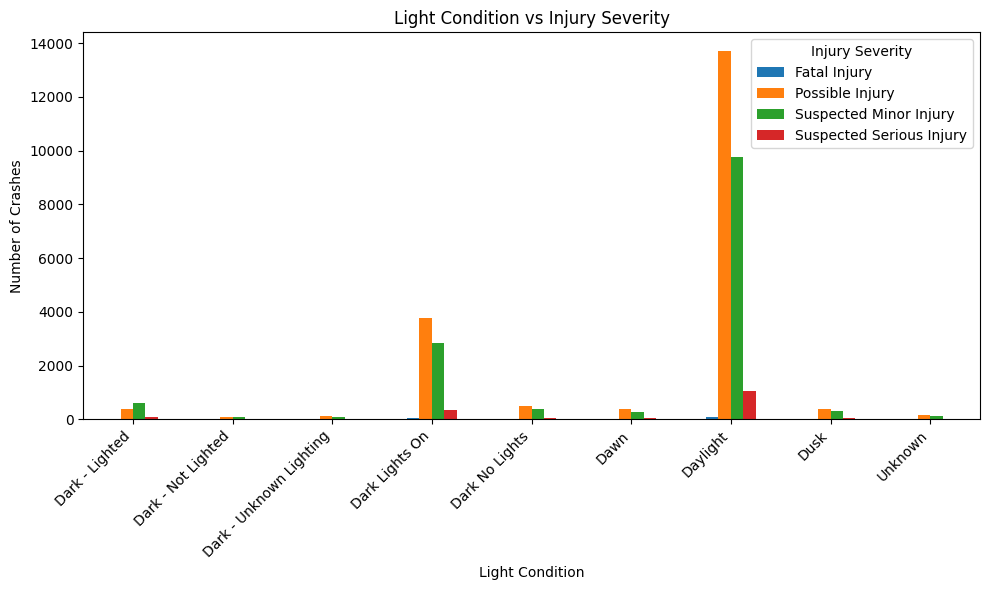

In [37]:
severity_levels = ["Fatal Injury","Possible Injury","Suspected Minor Injury","Suspected Serious Injury"]
pivot = pd.crosstab(df["light"], df["injury_severity"])
pivot = pivot.reindex(columns=severity_levels, fill_value=0)

pivot.plot(kind="bar", figsize=(10,6))
plt.title("Light Condition vs Injury Severity")
plt.xlabel("Light Condition")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Injury Severity")
plt.tight_layout()
plt.show()


Driver Substance Abuse vs Injury Severity

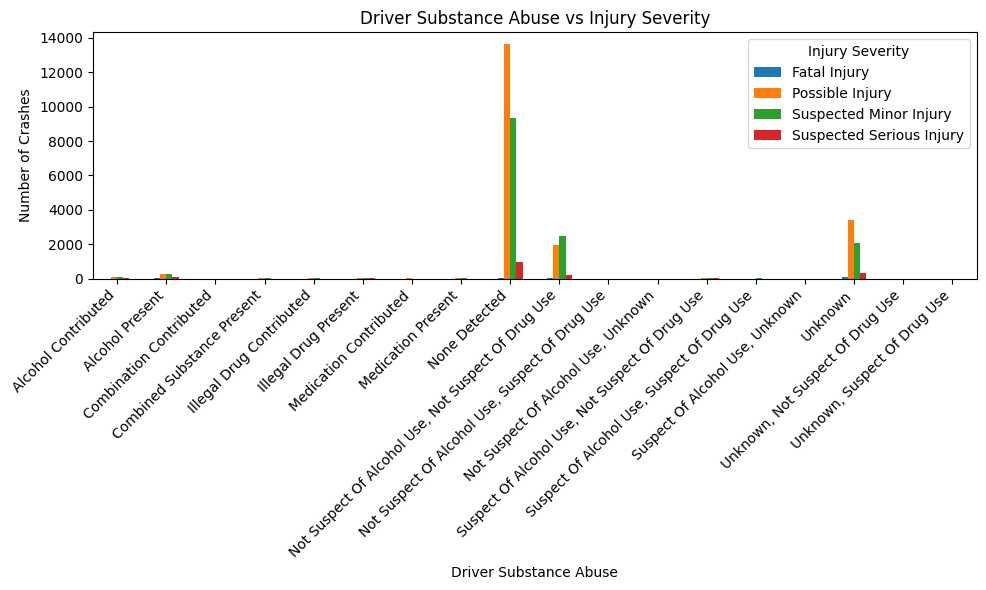

In [38]:
severity_levels = ["Fatal Injury","Possible Injury","Suspected Minor Injury","Suspected Serious Injury"]
pivot = pd.crosstab(df["driver_substance_abuse"], df["injury_severity"])
pivot = pivot.reindex(columns=severity_levels, fill_value=0)

pivot.plot(kind="bar", figsize=(10,6))
plt.title("Driver Substance Abuse vs Injury Severity")
plt.xlabel("Driver Substance Abuse")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Injury Severity")
plt.tight_layout()
plt.show()

Driver Distractin vs Injury Severity

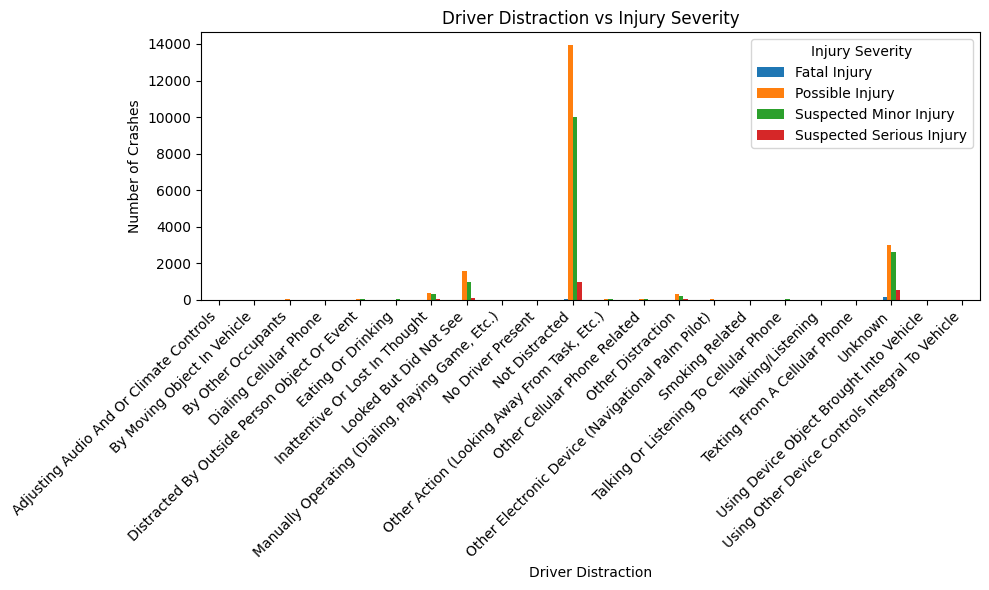

In [39]:
severity_levels = ["Fatal Injury","Possible Injury","Suspected Minor Injury","Suspected Serious Injury"]
pivot = pd.crosstab(df["driver_distracted_by"], df["injury_severity"])
pivot = pivot.reindex(columns=severity_levels, fill_value=0)

pivot.plot(kind="bar", figsize=(10,6))
plt.title("Driver Distraction vs Injury Severity")
plt.xlabel("Driver Distraction")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Injury Severity")
plt.tight_layout()
plt.show()

Speed limit vs Injury Severity

/tmp/ipython-input-1678381872.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data, labels=severity_levels, patch_artist=True)


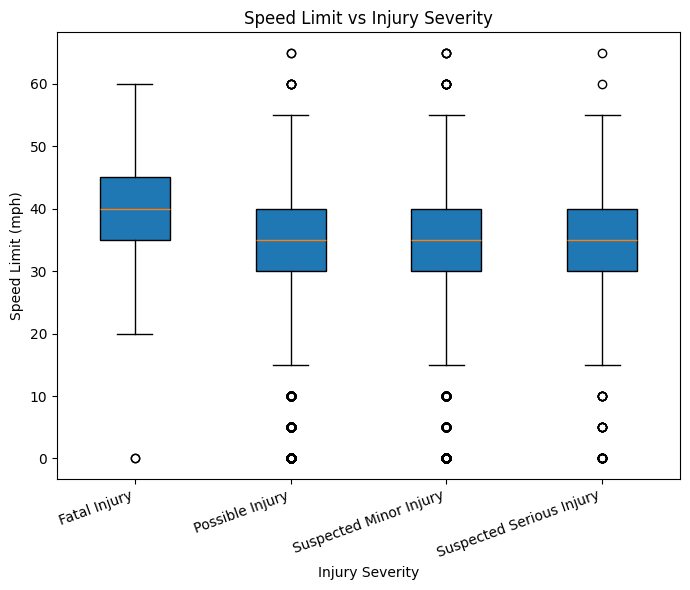

In [40]:
severity_levels = ["Fatal Injury","Possible Injury","Suspected Minor Injury","Suspected Serious Injury"]
data = [df.loc[df["injury_severity"] == sev, "speed_limit"].dropna() for sev in severity_levels]

fig, ax = plt.subplots(figsize=(7,6))
ax.boxplot(data, labels=severity_levels, patch_artist=True)
ax.set_title("Speed Limit vs Injury Severity")
ax.set_xlabel("Injury Severity")
ax.set_ylabel("Speed Limit (mph)")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.show()

Crash distribution by hour

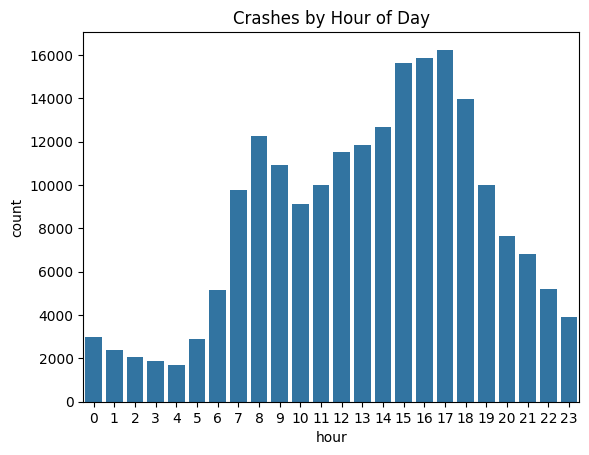

In [41]:

sns.countplot(x='hour', data=df)
plt.title("Crashes by Hour of Day")
plt.show()

Hotspots of Crashes


In [42]:
from sklearn.cluster import DBSCAN

coords = df[['latitude','longitude']].dropna()
db = DBSCAN(eps=0.01, min_samples=5).fit(coords)  # eps ~ 1km
df.loc[coords.index, 'spatial_cluster'] = db.labels_

# Cluster size = number of crashes in each cluster
cluster_counts = df['spatial_cluster'].value_counts()

top_clusters = cluster_counts.head(5).index.tolist()

import folium
from folium.plugins import HeatMap

# Base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=11)

# Heatmap layer
heat_data = df[['latitude','longitude']].dropna().values.tolist()
HeatMap(heat_data, radius=12).add_to(m)

# Marking centroids of top clusters
for c in top_clusters:
    cluster_points = df[df['spatial_cluster'] == c][['latitude','longitude']]
    if not cluster_points.empty:
        lat_center = cluster_points['latitude'].mean()
        lon_center = cluster_points['longitude'].mean()

        folium.CircleMarker(
            location=[lat_center, lon_center],
            radius=12,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.8,
            popup=f"Hotspot Cluster {c} - {len(cluster_points)} crashes"
        ).add_to(m)

# Save map
m.save("crash_hotspots.html")



ML Model incorporating all these features to predict the injury severity.




Classification Report (Injury Severity Prediction):
                           precision    recall  f1-score       support
Fatal Injury               0.004630  0.072727  0.008705     55.000000
No Apparent Injury         0.840259  0.430487  0.569305  49365.000000
Possible Injury            0.112548  0.240655  0.153369   5859.000000
Suspected Minor Injury     0.081109  0.202304  0.115793   4340.000000
Suspected Serious Injury   0.010565  0.150301  0.019742    499.000000
Unknown                    0.062697  0.427152  0.109345    604.000000
accuracy                   0.393202  0.393202  0.393202      0.393202
macro avg                  0.185301  0.253938  0.162710  60722.000000
weighted avg               0.700475  0.393202  0.487158  60722.000000


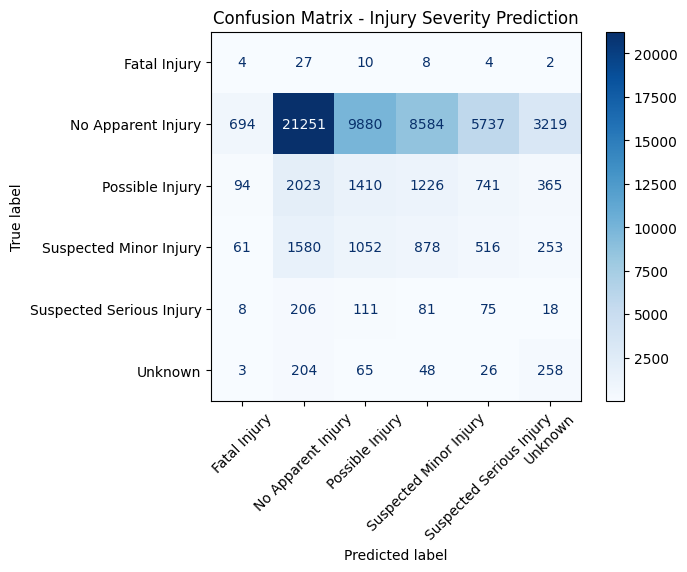

/tmp/ipython-input-58388604.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")


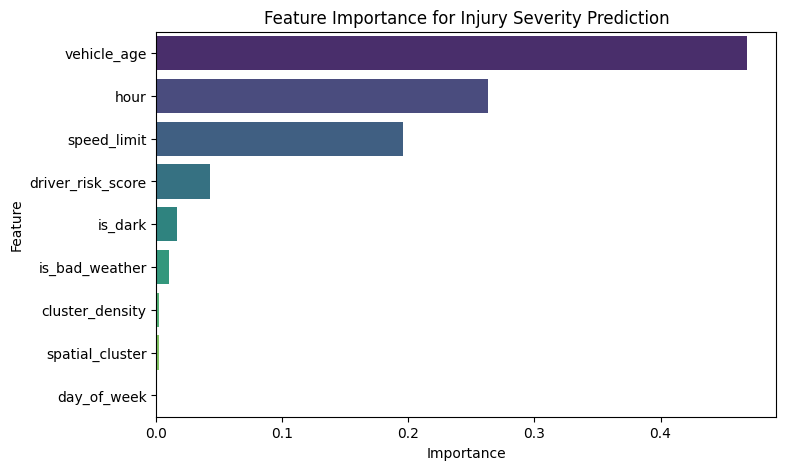

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Features (independent variables)
X = df[['hour','day_of_week','is_bad_weather','is_dark','driver_risk_score',
        'vehicle_age','speed_limit','spatial_cluster','cluster_density']]

# Target (dependent variable → changed here)
y = df['injury_severity']   # predict injury severity

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# 1. Classification Report
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
print("\nClassification Report (Injury Severity Prediction):\n", report_df)

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Injury Severity Prediction")
plt.show()

# 3. Feature Importance plot
importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="viridis")
plt.title("Feature Importance for Injury Severity Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()



Injury Severity distribution:
                    severity   count
0        No Apparent Injury  164547
1           Possible Injury   19531
2    Suspected Minor Injury   14465
3                   Unknown    2012
4  Suspected Serious Injury    1665
5              Fatal Injury     184


/tmp/ipython-input-42717084.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vehicle_age_sev = df.groupby(pd.cut(df['vehicle_age'].fillna(-1),
/tmp/ipython-input-42717084.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_age = vehicle_age_agg.groupby('age_bin')['injury_severity'].value_counts().unstack(fill_value=0)


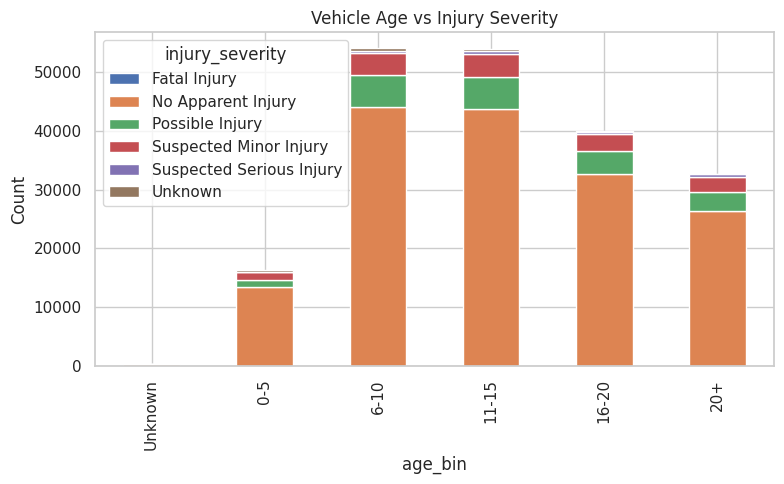


Model Evaluation (Injury Severity Prediction):
Accuracy: 0.39320180494713614
Balanced Accuracy: 0.2539378214166785
                          precision    recall  f1-score   support

            Fatal Injury       0.00      0.07      0.01        55
      No Apparent Injury       0.84      0.43      0.57     49365
         Possible Injury       0.11      0.24      0.15      5859
  Suspected Minor Injury       0.08      0.20      0.12      4340
Suspected Serious Injury       0.01      0.15      0.02       499
                 Unknown       0.06      0.43      0.11       604

                accuracy                           0.39     60722
               macro avg       0.19      0.25      0.16     60722
            weighted avg       0.70      0.39      0.49     60722



In [44]:
# metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#Summaries
# severity distribution
severity_counts = df['injury_severity'].value_counts().rename_axis('severity').reset_index(name='count')
print("\nInjury Severity distribution:\n", severity_counts)

# vehicle_age distribution by severity
vehicle_age_sev = df.groupby(pd.cut(df['vehicle_age'].fillna(-1),
                                    bins=[-1,0,5,10,15,20,100], right=True))['injury_severity'] \
                   .value_counts().unstack(fill_value=0).reset_index()

# driver risk vs severity
driver_risk_sev = df.groupby('driver_risk_score')['injury_severity'].value_counts().unstack(fill_value=0).reset_index()

#Visualizations
sns.set(style="whitegrid")


#Vehicle age vs severity (stacked)
vehicle_age_agg = df.copy()
vehicle_age_agg['age_bin'] = pd.cut(vehicle_age_agg['vehicle_age'].fillna(999),
                                    bins=[-1,0,5,10,15,20,100],
                                    labels=['Unknown','0-5','6-10','11-15','16-20','20+'])
pivot_age = vehicle_age_agg.groupby('age_bin')['injury_severity'].value_counts().unstack(fill_value=0)
pivot_age.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Vehicle Age vs Injury Severity")
plt.ylabel("Count")
plt.tight_layout()
plt.show()




#Model evaluation summary
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\nModel Evaluation (Injury Severity Prediction):")
print("Accuracy:", acc)
print("Balanced Accuracy:", bal_acc)
print(report)




Implementing SQL Queries


Severity by collison

In [45]:
import sqlite3

conn = sqlite3.connect("accidents.db")  # or use psycopg2 / mysql.connector

# Save the dataframe to a SQLite table
df.to_sql('accidents', conn, if_exists='replace', index=False)

query = """
SELECT collision_type,injury_severity AS severity,COUNT(*) AS crash_count,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS pct_of_total
FROM accidents
GROUP BY collision_type, injury_severity
ORDER BY collision_type, crash_count DESC;
"""
df_sql = pd.read_sql_query(query, conn)
print(df_sql.head())

conn.close() # Close the connection

   collision_type                  severity  crash_count  pct_of_total
0               0        No Apparent Injury         4584          2.26
1               0    Suspected Minor Injury          713          0.35
2               0           Possible Injury          591          0.29
3               0                   Unknown          183          0.09
4               0  Suspected Serious Injury           73          0.04


Severity by weather

In [46]:

conn = sqlite3.connect("accidents.db")  # or use psycopg2 / mysql.connector

# Save the dataframe to a SQLite table
df.to_sql('accidents', conn, if_exists='replace', index=False)

query = """
SELECT weather,injury_severity AS severity,COUNT(*) AS crash_count,
  ROUND(100.0 * COUNT(*) / SUM(COUNT(*)) OVER (), 2) AS pct_of_total
FROM accidents
GROUP BY weather, injury_severity
ORDER BY weather, crash_count DESC;
"""
df_sql = pd.read_sql_query(query, conn)
print(df_sql.head())

conn.close() # Close the connection

                    weather                severity  crash_count  pct_of_total
0  Blowing Sand, Soil, Dirt      No Apparent Injury           10          0.00
1  Blowing Sand, Soil, Dirt         Possible Injury            3          0.00
2  Blowing Sand, Soil, Dirt  Suspected Minor Injury            2          0.00
3              Blowing Snow      No Apparent Injury          143          0.07
4              Blowing Snow         Possible Injury           18          0.01


Severity by light condition

In [47]:
conn = sqlite3.connect("accidents.db")  # or use psycopg2 / mysql.connector

# Save the dataframe to a SQLite table
df.to_sql('accidents', conn, if_exists='replace', index=False)

query = """
SELECT light,injury_severity AS severity,COUNT(*) AS crash_count
FROM accidents
GROUP BY light, injury_severity
ORDER BY light, crash_count DESC;
"""
df_sql = pd.read_sql_query(query, conn)
print(df_sql.head())

conn.close() # Close the connection

            light                  severity  crash_count
0  Dark - Lighted        No Apparent Injury         5061
1  Dark - Lighted    Suspected Minor Injury          597
2  Dark - Lighted                   Unknown          491
3  Dark - Lighted           Possible Injury          395
4  Dark - Lighted  Suspected Serious Injury           69


Top routes/roads with highest severe crash counts

In [48]:
conn = sqlite3.connect("accidents.db")  # or use psycopg2 / mysql.connector

# Save the dataframe to a SQLite table
df.to_sql('accidents', conn, if_exists='replace', index=False)

query = """
SELECT road_name,
  COUNT(*) FILTER (WHERE injury_severity = 'Severe') AS severe_count,
  COUNT(*) AS total_count,
  ROUND(100.0 * COUNT(*) FILTER (WHERE injury_severity = 'Severe') / NULLIF(COUNT(*),0), 2) AS severe_pct
FROM accidents
GROUP BY road_name
ORDER BY severe_count DESC
LIMIT 50;

"""
df_sql = pd.read_sql_query(query, conn)
print(df_sql.head())

conn.close() # Close the connection

   road_name  severe_count  total_count  severe_pct
0       4640             0           61         0.0
1       4639             0            4         0.0
2       4638             0            1         0.0
3       4637             0            2         0.0
4       4636             0            1         0.0


Driver-related summary (substance, distracted, at-fault)




In [49]:
conn = sqlite3.connect("accidents.db")  # or use psycopg2 / mysql.connector

# Save the dataframe to a SQLite table
df.to_sql('accidents', conn, if_exists='replace', index=False)

query = """
SELECT driver_substance_abuse,driver_distracted_by,driver_at_fault,injury_severity AS severity,
COUNT(*) AS crash_count
FROM accidents
GROUP BY driver_substance_abuse, driver_distracted_by, driver_at_fault, injury_severity;
"""
df_sql = pd.read_sql_query(query, conn)
print(df_sql.head())

conn.close() # Close the connection

  driver_substance_abuse                     driver_distracted_by  \
0    Alcohol Contributed  Adjusting Audio And Or Climate Controls   
1    Alcohol Contributed  Adjusting Audio And Or Climate Controls   
2    Alcohol Contributed              By Moving Object In Vehicle   
3    Alcohol Contributed                       By Other Occupants   
4    Alcohol Contributed                       By Other Occupants   

  driver_at_fault                severity  crash_count  
0             Yes      No Apparent Injury            1  
1             Yes  Suspected Minor Injury            1  
2             Yes      No Apparent Injury            1  
3              No      No Apparent Injury            1  
4             Yes      No Apparent Injury           11  
